In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os, sys

In [19]:
# load exact data
exact = "exact.dat"
exact_data = np.loadtxt(exact)
Ls, exact_data = exact_data[:, 0], exact_data[:, 1]

# load sample data
sample = "sample_narrow.dat"
sample_data = np.loadtxt(sample)
sample_Ls, sample_data = sample_data[:, 0], sample_data[:, 1]

predict_data = []
for file in os.listdir("./seeds/"):
    predict_data.append(np.loadtxt(f"./seeds/{file}")[:,1])

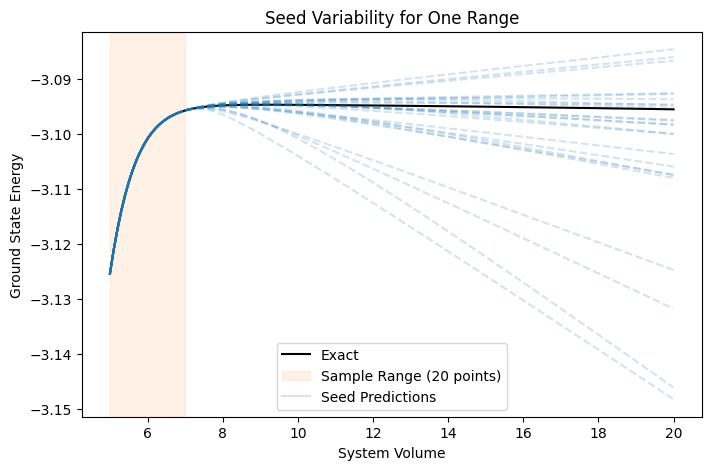

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(Ls, exact_data, 'k', lw=1.5, alpha=1.0, label="Exact")
ax.axvspan(5.0, 7.0, color="tab:orange", alpha=0.1, label="Sample Range (20 points)")
# ax.plot(sample_Ls, sample_data, 'o', color="C1", markersize=3, label="Sample")
for i, y_pred in enumerate(predict_data):
    # plot predicted curve
    # use solid inside training range, dashed outside
    inside = (Ls >= 0.0) & (Ls <= 7.0)
    if i == 0:
        ax.plot(Ls[inside], y_pred[inside], color="tab:blue", lw=1.5, ls="-", alpha=0.2, label="Seed Predictions")
        ax.plot(Ls[~inside], y_pred[~inside], color="tab:blue", lw=1.5, ls="--", alpha=0.2)
    ax.plot(Ls[inside], y_pred[inside], color="tab:blue", lw=1.5, ls="-", alpha=0.2)
    ax.plot(Ls[~inside], y_pred[~inside], color="tab:blue", lw=1.5, ls="--", alpha=0.2)
    
ax.set_xlabel("System Volume")
ax.set_ylabel("Ground State Energy")
ax.set_title("Seed Variability for One Range")
plt.legend()
plt.savefig("extrapolation_spaghetti.png")
plt.show()